In [1]:
# Seed for random events
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import pandas as pd

In [3]:
import tensorflow

C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages

In [4]:
bean_df = pd.read_csv('Resources/Dry_Bean_Dataset.csv')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Data Pre-Processing

In [5]:
X = bean_df.drop("Class", axis = 1)
y = bean_df['Class']
print(X.shape, y.shape)

(13611, 16) (13611,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [8]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# One-hot-encode the encoded labels
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Create Neural Network Model - Adam Optimizer

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# Create model and add layers
adam = Sequential()
adam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
adam.add(Dense(units = 7, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Compile and fit the model
adam.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = adam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.7586 - acc: 0.2586
Epoch 2/50
10208/10208 - 0s - loss: 1.2484 - acc: 0.5312
Epoch 3/50
10208/10208 - 0s - loss: 0.8211 - acc: 0.8170
Epoch 4/50
10208/10208 - 0s - loss: 0.6144 - acc: 0.8679
Epoch 5/50
10208/10208 - 0s - loss: 0.5041 - acc: 0.8790
Epoch 6/50
10208/10208 - 0s - loss: 0.4388 - acc: 0.8840
Epoch 7/50
10208/10208 - 0s - loss: 0.3978 - acc: 0.8863
Epoch 8/50
10208/10208 - 0s - loss: 0.3708 - acc: 0.8870
Epoch 9/50
10208/10208 - 0s - loss: 0.3519 - acc: 0.8882
Epoch 10/50
10208/10208 - 0s - loss: 0.3385 - acc: 0.8879
Epoch 11/50
10208/10208 - 0s - loss: 0.3282 - acc: 0.8893
Epoch 12/50
10208/10208 - 0s - loss: 0.3194 - acc: 0.8901
Epoch 13/50
10208/10208 - 0s - loss: 0.3140 - acc: 0.8901
Epoch 14/50
10208/10208 - 0s - loss: 0.3091 - acc: 0.8891
Epoch 15/50
10208/10208 - 0s - loss: 0.3041 - acc: 0.8921
Epoch 16/50
10208/10208 - 0s - loss: 0.2998 - acc: 0.8918
Epoch 17/50
10208/10208 - 0s - loss: 0.2963 - acc: 0.8941
Epoch 18/50
10208/10208

In [16]:
adam_losses = history.history['loss']
adam_accs = history.history['acc']

In [17]:
# Quantify Adam Model 
adam_loss, adam_acc = adam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Adam Optimizer - Loss: {adam_loss}, Accuracy: {adam_acc}")

3403/3403 - 0s - loss: 0.2458 - acc: 0.9177
Neural Network with Adam Optimizer - Loss: 0.24583254329796717, Accuracy: 0.9177196621894836


## Nadam Optimizer

In [18]:
# Create model and add layers
nadam = Sequential()
nadam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
nadam.add(Dense(units = 7, activation = 'softmax'))

In [19]:
# Compile and fit the model
nadam.compile(optimizer = 'nadam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
history = nadam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.7543 - acc: 0.2863
Epoch 2/50
10208/10208 - 0s - loss: 1.2578 - acc: 0.5052
Epoch 3/50
10208/10208 - 0s - loss: 0.8826 - acc: 0.7615
Epoch 4/50
10208/10208 - 0s - loss: 0.6578 - acc: 0.8573
Epoch 5/50
10208/10208 - 0s - loss: 0.5274 - acc: 0.8791
Epoch 6/50
10208/10208 - 0s - loss: 0.4495 - acc: 0.8876
Epoch 7/50
10208/10208 - 0s - loss: 0.4006 - acc: 0.8891
Epoch 8/50
10208/10208 - 0s - loss: 0.3677 - acc: 0.8899
Epoch 9/50
10208/10208 - 0s - loss: 0.3446 - acc: 0.8919
Epoch 10/50
10208/10208 - 0s - loss: 0.3281 - acc: 0.8948
Epoch 11/50
10208/10208 - 0s - loss: 0.3153 - acc: 0.8965
Epoch 12/50
10208/10208 - 0s - loss: 0.3046 - acc: 0.8972
Epoch 13/50
10208/10208 - 0s - loss: 0.2969 - acc: 0.9002
Epoch 14/50
10208/10208 - 0s - loss: 0.2900 - acc: 0.9009
Epoch 15/50
10208/10208 - 0s - loss: 0.2838 - acc: 0.9030
Epoch 16/50
10208/10208 - 0s - loss: 0.2790 - acc: 0.9032
Epoch 17/50
10208/10208 - 0s - loss: 0.2748 - acc: 0.9051
Epoch 18/50
10208/10208

In [21]:
nadam_losses = history.history['loss']
nadam_accs = history.history['acc']

In [22]:
# Quantify Nadam Model 
nadam_loss, nadam_acc = nadam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Nadam Optimizer - Loss: {nadam_loss}, Accuracy: {nadam_acc}")

3403/3403 - 0s - loss: 0.2294 - acc: 0.9186
Neural Network with Nadam Optimizer - Loss: 0.22941215372229196, Accuracy: 0.9186012148857117


## RMSProp Optimizer

In [23]:
# Create model and add layers
rmsprop = Sequential()
rmsprop.add(Dense(units = 14, activation = 'relu', input_dim = 16))
rmsprop.add(Dense(units = 7, activation = 'softmax'))

In [24]:
# Compile and fit the model
rmsprop.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = rmsprop.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.5631 - acc: 0.3073
Epoch 2/50
10208/10208 - 0s - loss: 1.1235 - acc: 0.5765
Epoch 3/50
10208/10208 - 0s - loss: 0.8354 - acc: 0.7789
Epoch 4/50
10208/10208 - 0s - loss: 0.6418 - acc: 0.8503
Epoch 5/50
10208/10208 - 0s - loss: 0.5165 - acc: 0.8726
Epoch 6/50
10208/10208 - 0s - loss: 0.4412 - acc: 0.8794
Epoch 7/50
10208/10208 - 0s - loss: 0.3950 - acc: 0.8851
Epoch 8/50
10208/10208 - 0s - loss: 0.3661 - acc: 0.8857
Epoch 9/50
10208/10208 - 0s - loss: 0.3468 - acc: 0.8870
Epoch 10/50
10208/10208 - 0s - loss: 0.3331 - acc: 0.8867
Epoch 11/50
10208/10208 - 0s - loss: 0.3223 - acc: 0.8892
Epoch 12/50
10208/10208 - 0s - loss: 0.3145 - acc: 0.8906
Epoch 13/50
10208/10208 - 0s - loss: 0.3083 - acc: 0.8918
Epoch 14/50
10208/10208 - 0s - loss: 0.3018 - acc: 0.8948
Epoch 15/50
10208/10208 - 0s - loss: 0.2987 - acc: 0.8949
Epoch 16/50
10208/10208 - 0s - loss: 0.2937 - acc: 0.8962
Epoch 17/50
10208/10208 - 0s - loss: 0.2903 - acc: 0.8973
Epoch 18/50
10208/10208

In [26]:
rmsprop_losses = history.history['loss']
rmsprop_accs = history.history['acc']

In [27]:
# Quantify RMSProp Model 
rmsprop_loss, rmsprop_acc = rmsprop.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with RMSProp Optimizer - Loss: {rmsprop_loss}, Accuracy: {rmsprop_acc}") 

3403/3403 - 0s - loss: 0.2495 - acc: 0.9118
Neural Network with RMSProp Optimizer - Loss: 0.24946407854224245, Accuracy: 0.9118424654006958


## SGD Optimizer

In [28]:
# Create model and add layers
sgd = Sequential()
sgd.add(Dense(units = 14, activation = 'relu', input_dim = 16))
sgd.add(Dense(units = 7, activation = 'softmax'))

In [29]:
# Compile and fit the model
sgd.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
history = sgd.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.9052 - acc: 0.2403
Epoch 2/50
10208/10208 - 0s - loss: 1.7625 - acc: 0.3292
Epoch 3/50
10208/10208 - 0s - loss: 1.6586 - acc: 0.3568
Epoch 4/50
10208/10208 - 0s - loss: 1.5406 - acc: 0.3988
Epoch 5/50
10208/10208 - 0s - loss: 1.4058 - acc: 0.4403
Epoch 6/50
10208/10208 - 0s - loss: 1.2647 - acc: 0.4726
Epoch 7/50
10208/10208 - 0s - loss: 1.1272 - acc: 0.5745
Epoch 8/50
10208/10208 - 0s - loss: 1.0022 - acc: 0.7065
Epoch 9/50
10208/10208 - 0s - loss: 0.8935 - acc: 0.7800
Epoch 10/50
10208/10208 - 0s - loss: 0.8025 - acc: 0.8162
Epoch 11/50
10208/10208 - 0s - loss: 0.7272 - acc: 0.8405
Epoch 12/50
10208/10208 - 0s - loss: 0.6660 - acc: 0.8526
Epoch 13/50
10208/10208 - 0s - loss: 0.6159 - acc: 0.8636
Epoch 14/50
10208/10208 - 0s - loss: 0.5750 - acc: 0.8686
Epoch 15/50
10208/10208 - 0s - loss: 0.5410 - acc: 0.8727
Epoch 16/50
10208/10208 - 0s - loss: 0.5124 - acc: 0.8759
Epoch 17/50
10208/10208 - 0s - loss: 0.4885 - acc: 0.8776
Epoch 18/50
10208/10208

In [31]:
sgd_losses = history.history['loss']
sgd_accs = history.history['acc']

In [32]:
# Quantify Nadam Model 
sgd_loss, sgd_acc = sgd.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with SGD Optimizer - Loss: {sgd_loss}, Accuracy: {sgd_acc}")

3403/3403 - 0s - loss: 0.3060 - acc: 0.8936
Neural Network with SGD Optimizer - Loss: 0.30597892767045554, Accuracy: 0.8936232924461365


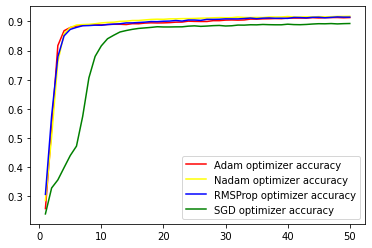

In [33]:
## Plot model accuracy and loss over epochs

import matplotlib.pyplot as plt

epochs = range(1,51)
plt.plot(epochs, adam_accs, 'red', label = "Adam optimizer accuracy")
plt.plot(epochs, nadam_accs, 'yellow', label = "Nadam optimizer accuracy")
plt.plot(epochs, rmsprop_accs, 'blue', label = "RMSProp optimizer accuracy")
plt.plot(epochs, sgd_accs, 'green', label = "SGD optimizer accuracy")
plt.legend()
plt.show()

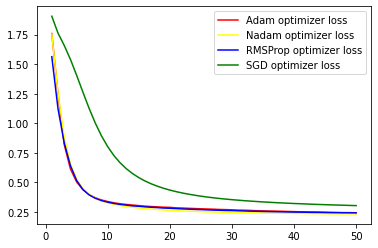

In [34]:
plt.plot(epochs, adam_losses, 'red', label = "Adam optimizer loss")
plt.plot(epochs, nadam_losses, 'yellow', label = "Nadam optimizer loss")
plt.plot(epochs, rmsprop_losses, 'blue', label = "RMSProp optimizer loss")
plt.plot(epochs, sgd_losses, 'green', label = "SGD optimizer loss")
plt.legend()
plt.show()